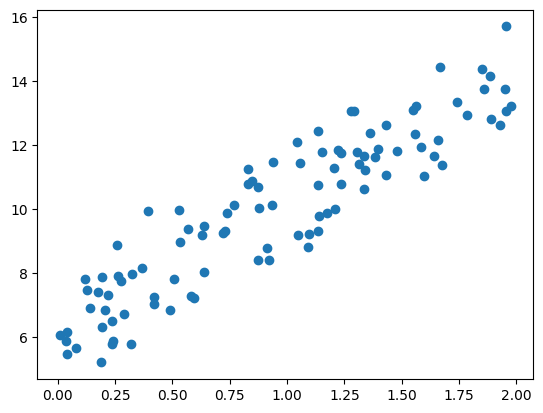

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
x  = 2 * np.random.rand(100, 1)
y = 6 + 4 * x+ np.random.randn(100, 1) #정규분포 노이즈를 추가 → 실제 데이터처럼 완벽한 직선이 아니라 약간 퍼지게

plt.scatter(x, y)

In [ ]:
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y-y_pred))/N
  return cost

In [ ]:
def gradient_weight_updates(w1, w0, x, y, learning_rate = 0.01):
  N = len(y)
  #기울기 업데이트 벡터
  w1_update = np.zeros_like(w1)
  w0_update = np.zeros_like(w0)

  #예측 배열 계산, 예측과 실제 값의 차이 계산
  y_pred = np.dot(x, w1.T) + w0
  diff = y - y_pred
  w0_factors = np.ones((N, 1))

  #업데이트
  w1_update = -(2/N)*learning_rate * np.dot(x.T, diff)
  w0_update = -(2/N)*learning_rate * np.dot(w0_factors.T, diff)

  return w1_update, w0_update

In [ ]:
def gradient_descent_steps(x, y, iters = 10000):
  w1 = np.zeros((1, 1))
  w0 = np.zeros((1,1))
  for i in range(iters):
    w1_update,w0_update = gradient_weight_updates(w1, w0, x, y)
    w1 = w1 - w1_update
    w0 = w0 - w0_update
  return w1, w0


In [ ]:
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y-y_pred))/N
  return cost

w1, w0 = gradient_descent_steps(x, y, iters = 1000)
print("w1: {0:.3f} w0: {0:.3f}".format(w1[0,0], w0[0,0]))

y_pred = w1[0, 0] * x + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.022 w0: 4.022
Gradient Descent Total Cost:0.9935


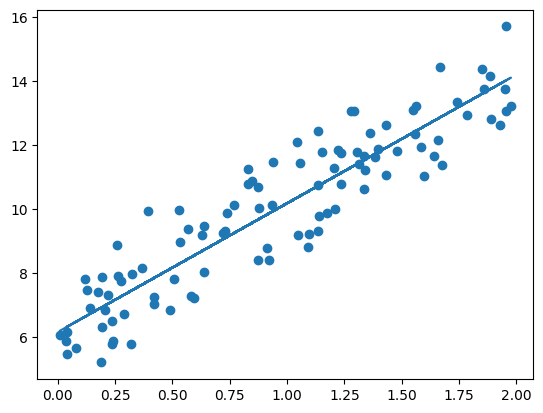

In [ ]:
plt.scatter(x, y)
plt.plot(x, y_pred)

In [ ]:
def stochastic_gradient_descent_steps(x, y, batch_size = 10, iters = 1000):
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))

  for ind in range(iters):
    stochastic_random_index = np.random.permutation(x.shape[0])
    sample_x = x[stochastic_random_index[:batch_size]]
    sample_y = y[stochastic_random_index[:batch_size]]

    w1_update, w0_update = gradient_weight_updates(w1, w0, sample_x, sample_y)
    w1 = w1 - w1_update
    w0 = w0 - w0_update
  return w1, w0

In [ ]:
w1, w0 = stochastic_gradient_descent_steps(x, y, iters = 1000)
print("w:", round(w1[0,0], 3), "w0:", round(w0[0,0], 3))
y_pred = w1[0, 0] * x + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w: 4.007 w0: 6.137
Stochastic Gradient Descent Total Cost:0.9953


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import fetch_california_housing
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

boston = pd.read_csv("/content/drive/MyDrive/Euron/BostonHousing.csv")
boston.rename(columns = {'CMEDV':'PRICE'}, inplace = True)
boston.head()

,Unnamed: 0,TOWN,LON,LAT,PRICE,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


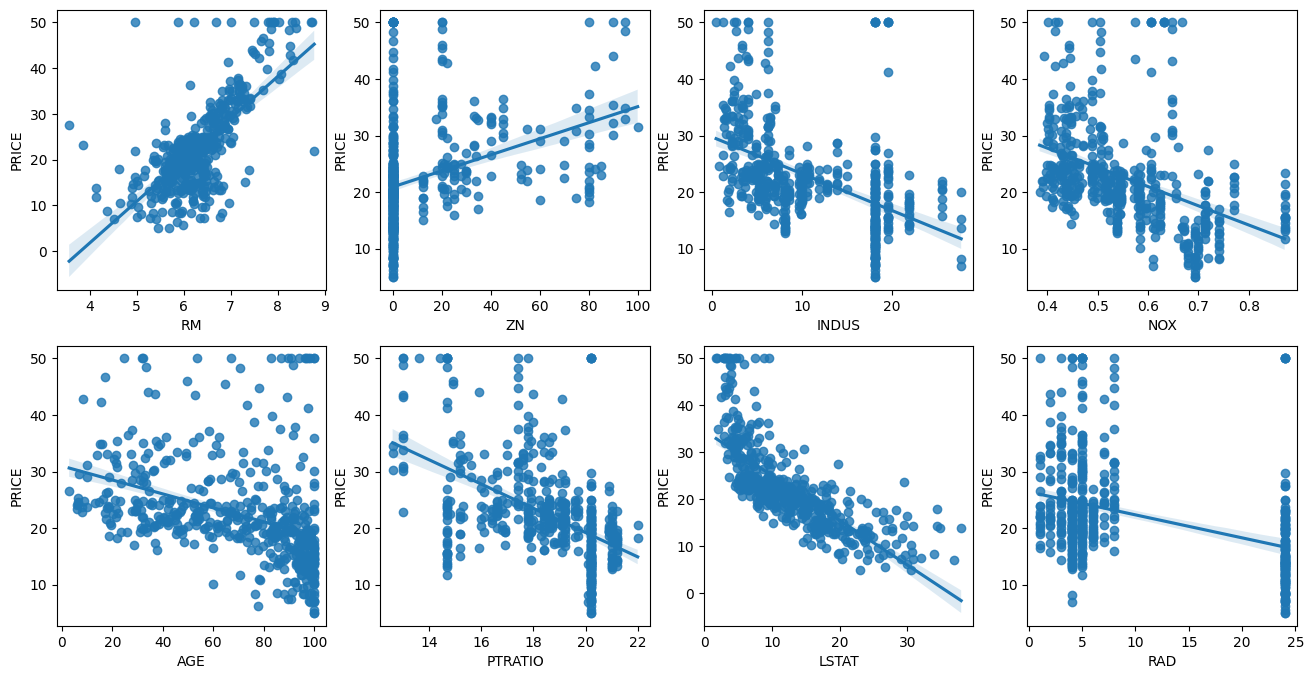

In [ ]:
fig, axs = plt.subplots(figsize = (16, 8), ncols = 4, nrows = 2)

lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO','LSTAT', 'RAD']

for i, feature in enumerate(lm_features):
  row = i // 4
  col = i % 4
  sns.regplot(x=feature, y = 'PRICE', data = boston, ax = axs[row][col])

In [ ]:
boston.select_dtypes(include = ['object']).head()

,TOWN
0,Nahant
1,Swampscott
2,Swampscott
3,Marblehead
4,Marblehead


In [ ]:
boston.drop(['TOWN'], axis = 1, inplace = True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = boston['PRICE']
X_data = boston.drop(['PRICE'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state = 156)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 16.956, RMSE : 4.118
Variance score : 0.760


In [ ]:
print('절편 값:', lr.intercept_)
print('회귀 계수 값:', np.round(lr.coef_, 1))

절편 값: -779.9344571908823
회귀 계수 값: [  0.   -6.    9.3  -0.1   0.1   0.    3.  -17.3   3.3   0.   -1.6   0.4
  -0.   -0.9   0.   -0.6]


In [ ]:
coeff = pd.Series(data = np.round(lr.coef_, 1), index = X_data.columns)
coeff.sort_values(ascending = False)

,0
LAT,9.3
RM,3.3
CHAS,3.0
RAD,0.4
ZN,0.1
AGE,0.0
INDUS,0.0
Unnamed: 0,0.0
B,0.0
TAX,-0.0


In [ ]:
from sklearn.model_selection import cross_val_score

y_target = boston['PRICE']
X_data = boston.drop(['PRICE'], axis = 1, inplace = False)

lr = LinearRegression()

neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 교차 검증의 개별 Negative MSE scores:  [-22.37 -26.86 -33.14 -82.68 -32.4 ]
 5 교차 검증의 개별 RMSE scores :  [4.73 5.18 5.76 9.09 5.69]
 5 교차 검증의 평균 RMSE : 6.091 


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

#다항식으로 변환한 단항식 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n', X)

poly=PolynomialFeatures(degree = 2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [ ]:
def polynomial_func(X):
  y = 1+ 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
  return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


In [ ]:
#3차 다항식 변환
poly_ftr = PolynomialFeatures(degree = 3).fit_transform(X)
print('3차 다항식 계수 feature:\n', poly_ftr)

#학습, 회귀계수 확인

model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape : ', model.coef_.shape)

3차 다항식 계수 feature:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape :  (10,)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
  y = 1+ 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
  return y

#파이프라인 객체로 변환과 선형회귀 모델 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]



Degree 1 회귀 계수는 
[-1.61]
Degree 1 교차 검증 점수: 0.408

Degree 4 회귀 계수는 
[  0.47 -17.79  23.59  -7.26]
Degree 4 교차 검증 점수: 0.043

Degree 15 회귀 계수는 
[-2.98293000e+03  1.03899390e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08]
Degree 15 교차 검증 점수: 181238256.564


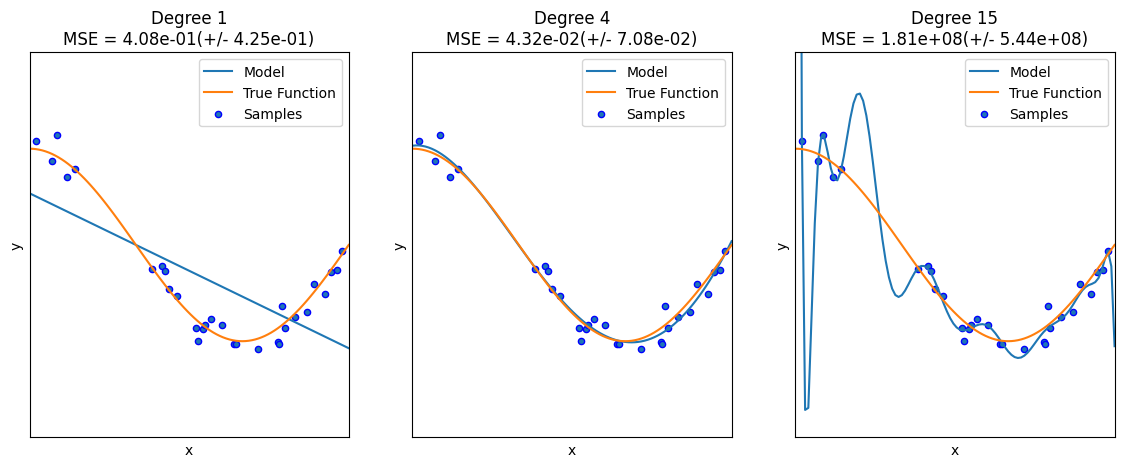

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

#임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환
def true_fun(X):
  return np.cos(1.5*np.pi*X)

np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize = (14, 5))
degrees = [1, 4, 15]

#다항 회귀 차수 변화하며 비교

for i in range(len(degrees)):
  ax = plt.subplot(1, len(degrees), i+1)
  plt.setp(ax, xticks = ( ), yticks = ( ))

  polynomial_features = PolynomialFeatures(degree = degrees[i], include_bias = False)
  linear_regression = LinearRegression()
  pipeline = Pipeline([("polynomial_feature", polynomial_features),
                       ("linear_regression", linear_regression)])
  pipeline.fit(X.reshape(-1,1), y)

  #교차검증으로 다항회귀 평가
  scores = cross_val_score(pipeline, X.reshape(-1,1), y, cv =10, scoring = "neg_mean_squared_error")
  #파이프라인 세부 객체에 접근하는 named_steps['객체명'] -> 회귀계수 추출
  coeff = pipeline.named_steps['linear_regression'].coef_
  print('\nDegree {0} 회귀 계수는 \n{1}'.format(degrees[i], np.round(coeff, 2)))
  print('Degree {0} 교차 검증 점수: {1:.3f}'.format(degrees[i], -1*np.mean(scores)))

  #0부터 1까지 테스트 데이터를 100개로 나눠 예측 수행
  #테스트 데이터 세트에 회귀 예측 수행하고 예측 곡선과 실제 곡선을 그려서 비교
  X_test = np.linspace(0, 1, 100)
  plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label = 'Model')
  plt.plot(X_test, true_fun(X_test), label = 'True Function')
  plt.scatter(X, y, edgecolor = 'b', s=20, label = 'Samples')

  plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0,1)); plt.ylim((-2,2)); plt.legend(loc = "best")
  plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -1*np.mean(scores), np.std(scores)))
plt.show()

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE : {0:.3f} '.format(avg_rmse))

5 folds의 개별 Negative MSE scores:  [-13.47 -23.56 -28.86 -74.54 -27.42]
5 folds의 개별 RMSE scores :  [3.67 4.85 5.37 8.63 5.24]
5 folds의 평균 RMSE : 5.553 


In [ ]:
alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas:

  ridge = Ridge(alpha = alpha)

  neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
  rmse_scores = np.sqrt(-1 * neg_mse_scores)
  avg_rmse = np.mean(rmse_scores)

  print('alpha: {0} 5 folds의 평균 RMSE: {1:.3f} '.format(alpha, avg_rmse))

alpha: 0 5 folds의 평균 RMSE: 6.091 
alpha: 0.1 5 folds의 평균 RMSE: 5.952 
alpha: 1 5 folds의 평균 RMSE: 5.667 
alpha: 10 5 folds의 평균 RMSE: 5.553 
alpha: 100 5 folds의 평균 RMSE: 5.457 


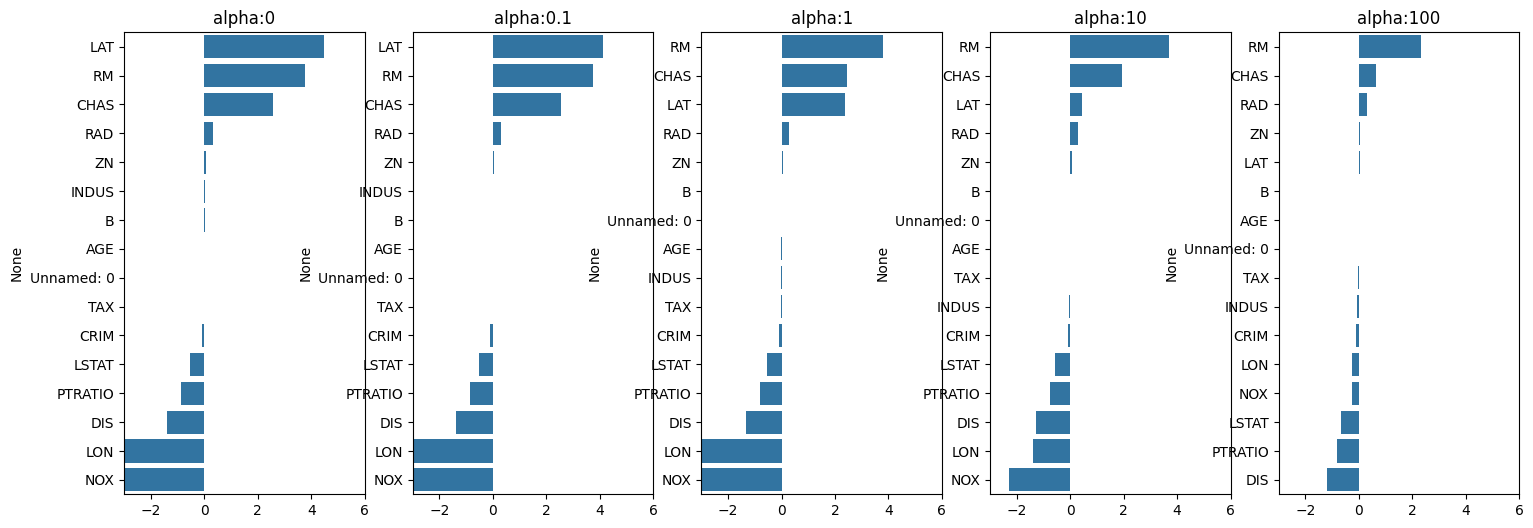

In [ ]:
#회귀 계수 값을 가로 막대 그래프로 시각화
#5개의 열
fig, axs = plt.subplots(figsize = (18, 6), nrows = 1, ncols = 5)
# 각 알파에 따른 회귀계수 저장하는 DF
coeff_df = pd.DataFrame()
#알파 리스트 값 차례 입력 -> 회귀 계수 값 시각화, 데이터 저장. pos는 axis의 위치 지정

for pos, alpha in enumerate(alphas):
  ridge = Ridge(alpha = alpha)
  ridge.fit(X_data, y_target)

  coeff = pd.Series(data = ridge.coef_, index=X_data.columns)
  col_name = 'alpha:' + str(alpha)
  coeff_df[col_name] = coeff

  coeff = coeff.sort_values(ascending = False)
  axs[pos].set_title(col_name)
  axs[pos].set_xlim(-3, 6)
  sns.barplot(x=coeff.values, y=coeff.index, ax = axs[pos])

plt.show()

In [ ]:
col_sort = 'alpha:'  + str(0)
coeff_df.sort_values(by = col_sort, ascending = False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
LAT,4.469808,4.103766,2.364394,0.443810,0.055374
RM,3.753865,3.761137,3.798301,3.681868,2.329743
CHAS,2.577968,2.558139,2.446222,1.930032,0.639979
RAD,0.306802,0.304895,0.295473,0.291323,0.324131
ZN,0.046573,0.046718,0.047819,0.051323,0.056322
INDUS,0.015226,0.010701,-0.012611,-0.041814,-0.049634
B,0.009177,0.009241,0.009576,0.009968,0.009331
AGE,0.002452,0.001535,-0.003771,-0.011287,0.000087
Unnamed: 0,-0.000020,-0.000197,-0.001045,-0.001916,-0.001445
TAX,-0.012880,-0.012897,-0.013048,-0.013786,-0.015779


In [ ]:
from sklearn.linear_model import Lasso, ElasticNet

def get_linear_reg_eval(model_name, params = None, X_data_n = None,
                        y_target_n = None, verbose = True, return_coeff = True):
  coeff_df = pd.DataFrame()
  if verbose : print('######', model_name, '#####')
  for param in params:
    if model_name == 'Ridge' : model = Ridge(alpha = param)
    elif model_name == 'Lasso' : model = Lasso(alpha = param)
    elif model_name == 'ElasticNet' : model = ElasticNet(alpha = param, l1_ratio = 0.7)

    neg_mse_scores = cross_val_score(model, X_data_n, y_target_n,
                                     scoring = "neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))

    print('alpha {0}일 때 5 folds의 평균 RMSE: {1:.3f}'.format(param, avg_rmse))

    #회귀계수 추출
    model.fit(X_data_n, y_target_n)

    if return_coeff:
      coeff = pd.Series(data=model.coef_, index=X_data_n.columns)
      colname = 'alpha:' + str(param)
      coeff_df[colname] = coeff
  return coeff_df

In [ ]:
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params = lasso_alphas, X_data_n = X_data, y_target_n = y_target)


###### Lasso #####
alpha 0.07일 때 5 folds의 평균 RMSE: 5.677
alpha 0.1일 때 5 folds의 평균 RMSE: 5.694
alpha 0.5일 때 5 folds의 평균 RMSE: 5.831
alpha 1일 때 5 folds의 평균 RMSE: 6.036
alpha 3일 때 5 folds의 평균 RMSE: 6.732


In [ ]:
sort_column = 'alpha:' + str(lasso_alphas[0])
coeff_lasso_df.sort_values(by = sort_column, ascending = False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.790649,3.702960,2.486456,0.923414,0.000000
CHAS,1.455639,0.975605,0.000000,0.000000,0.000000
RAD,0.284398,0.287359,0.281888,0.258960,0.035355
ZN,0.051634,0.051719,0.051376,0.050203,0.036227
B,0.010191,0.010190,0.009397,0.008153,0.006386
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
LON,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
LAT,0.000000,0.000000,0.000000,0.000000,0.000000
Unnamed: 0,-0.002031,-0.001923,-0.000838,0.000301,0.003112
AGE,-0.013748,-0.011976,0.002718,0.021160,0.045137


In [ ]:
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params = elastic_alphas,
                                       X_data_n = X_data, y_target_n = y_target)

###### ElasticNet #####
alpha 0.07일 때 5 folds의 평균 RMSE: 5.611
alpha 0.1일 때 5 folds의 평균 RMSE: 5.606
alpha 0.5일 때 5 folds의 평균 RMSE: 5.645
alpha 1일 때 5 folds의 평균 RMSE: 5.857
alpha 3일 때 5 folds의 평균 RMSE: 6.567


In [ ]:
sort_column = 'alpha:' + str(elastic_alphas[0])
coeff_elastic_df.sort_values(by = sort_column, ascending = False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574931,3.413639,1.910870,0.927486,0.000000
CHAS,1.346035,0.992987,0.000000,0.000000,0.000000
RAD,0.291906,0.295710,0.304775,0.285479,0.125170
ZN,0.052622,0.053046,0.054488,0.052946,0.037334
B,0.010066,0.010008,0.009047,0.008239,0.006941
LON,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
LAT,0.000000,0.000000,0.000000,0.000000,0.000000
Unnamed: 0,-0.001977,-0.001866,-0.000779,0.000096,0.002524
AGE,-0.012107,-0.010130,0.006992,0.020477,0.045547
TAX,-0.014306,-0.014630,-0.016185,-0.016499,-0.012445


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

def get_scaled_data(method = 'None', p_degree= None, input_data = None):
  if method == 'Standard':
    scaled_data = StandardScaler().fit_transform(input_data)
  elif method == 'MinMax':
    scaled_data = MinMaxScaler().fit_transform(input_data)
  elif method == 'Log':
    scaled_data = np.log1p(np.clip(input_data, a_min=0, a_max=None))
  else:
    scaled_data = input_data

  if p_degree != None:
    scaled_data = PolynomialFeatures(degree=p_degree,
                                     include_bias = False).fit_transform(scaled_data)
  return scaled_data

In [ ]:
alphas = [0.1, 1, 10, 100]

scaled_methods = [(None, None), ('Standard', None), ('Standard', 2), ('MinMax', None), ('MinMax', 2), ('Log', None)]

for scaled_method in scaled_methods:
  X_data_scaled = get_scaled_data(method = scaled_method[0], p_degree = scaled_method[1],
                                  input_data = X_data)
  print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scaled_method[0], scaled_method[1]))
  get_linear_reg_eval('Ridge', params = alphas, X_data_n = X_data_scaled, y_target_n = y_target,
                      verbose = False, return_coeff = False)


## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5 folds의 평균 RMSE: 5.952
alpha 1일 때 5 folds의 평균 RMSE: 5.667
alpha 10일 때 5 folds의 평균 RMSE: 5.553
alpha 100일 때 5 folds의 평균 RMSE: 5.457

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5 folds의 평균 RMSE: 6.087
alpha 1일 때 5 folds의 평균 RMSE: 6.057
alpha 10일 때 5 folds의 평균 RMSE: 5.852
alpha 100일 때 5 folds의 평균 RMSE: 5.553

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5 folds의 평균 RMSE: 12.541
alpha 1일 때 5 folds의 평균 RMSE: 8.246
alpha 10일 때 5 folds의 평균 RMSE: 5.924
alpha 100일 때 5 folds의 평균 RMSE: 5.006

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5 folds의 평균 RMSE: 6.021
alpha 1일 때 5 folds의 평균 RMSE: 5.700
alpha 10일 때 5 folds의 평균 RMSE: 5.872
alpha 100일 때 5 folds의 평균 RMSE: 7.654

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5 folds의 평균 RMSE: 5.559
alpha 1일 때 5 folds의 평균 RMSE: 4.475
alpha 10일 때 5 folds의 평균 RMSE: 5.344
alpha 100일 때 5 folds의 평균 RMSE: 6.467

## 변환 유형:Log, Polynomial Degree:None
alpha 0.1일 때 5 folds의 평균 RMSE: 4.72

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size = 0.3, random_state = 0)

In [3]:
from sklearn.metrics import accuracy_score, roc_auc_score

#로지스틱 회귀를 이용하여 학습 및 예측 수행
#solver 인자값을 생성사로 입력 X 기본은 lbfgs
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)
lr_preds_proba = lr_clf.predict_proba(X_test)[:, 1]

#정확도와 roc_auc 측정
print('accuracy: {0:.3f}, roc_auc: {1:.3f}'.format(accuracy_score(y_test, lr_preds),
                                                   roc_auc_score(y_test, lr_preds_proba)))

accuracy: 0.977, roc_auc: 0.995


In [6]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']

#sovler 값 별로 학습 후 성능 평가
for solver in solvers:
  lr_clf = LogisticRegression(solver = solver, max_iter = 600)
  lr_clf.fit(X_train, y_train)
  lr_preds = lr_clf.predict(X_test)
  lr_preds_proba = lr_clf.predict_proba(X_test)[:, 1]

  #accuracy roc_auc 측정
  print('solver:{0}, accuracy: {1:.3f}, roc_auc: {2:.3f}'.format(solver,
                                                               accuracy_score(y_test, lr_preds),
                                                               roc_auc_score(y_test, lr_preds_proba)))


solver:lbfgs, accuracy: 0.977, roc_auc: 0.995
solver:liblinear, accuracy: 0.982, roc_auc: 0.995
solver:newton-cg, accuracy: 0.977, roc_auc: 0.995
solver:sag, accuracy: 0.982, roc_auc: 0.995
solver:saga, accuracy: 0.982, roc_auc: 0.995


In [7]:
from sklearn.model_selection import GridSearchCV

params = {'solver' : ['liblinear', 'lbfgs'],
          'penalty' : ['l2', 'l1'],
          'C': [0.01, 0.1, 1, 5, 10]}

lr_clf = LogisticRegression()
grid_clf = GridSearchCV(lr_clf, param_grid = params, scoring = 'accuracy', cv = 3)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터: {0}, 최적 평균 정확도: {1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미터: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}, 최적 평균 정확도: 0.979


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#보스턴 데이터 세트 로드
boston = pd.read_csv('/content/drive/MyDrive/Euron/BostonHousing.csv')

boston.head(2)

,Unnamed: 0,TOWN,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98
1,1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14


In [5]:
boston.rename(columns = {'CMEDV': 'PRICE'}, inplace =True)
boston.select_dtypes(include = 'object').head(2)

,TOWN
0,Nahant
1,Swampscott


In [6]:
boston.drop(['TOWN'], axis = 1, inplace = True)

In [7]:
y_target = boston['PRICE']
X_data = boston.drop(['PRICE'], axis = 1, inplace = False)

rf = RandomForestRegressor(random_state= 0, n_estimators = 1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 교차 검증의 개별 negative MSE scores: ', np.round(neg_mse_scores, 2))
print('5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print('5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

5 교차 검증의 개별 negative MSE scores:  [ -8.26 -11.04 -21.35 -44.78 -32.28]
5 교차 검증의 개별 RMSE scores :  [2.87 3.32 4.62 6.69 5.68]
5 교차 검증의 평균 RMSE : 4.638 


In [8]:
def get_model_cv_prediction(model, X_data, y_target):
  neg_mse_scores = cross_val_score(model, X_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
  rmse_scores = np.sqrt(-1 * neg_mse_scores)
  avg_rmse = np.mean(rmse_scores)
  print('#####', model.__class__.__name__, '#####')
  print('5 교차 검증의 평균 RMSE: {0:.3f}'.format(avg_rmse))

In [13]:
X_data.head()

,Unnamed: 0,LON,LAT,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,-70.955,42.2550,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,1,-70.950,42.2875,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,2,-70.936,42.2830,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,3,-70.928,42.2930,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,4,-70.922,42.2980,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [14]:
X_data = X_data.drop(['Unnamed: 0'], axis=1)

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import warnings
warnings.filterwarnings('ignore')

dt_reg = DecisionTreeRegressor(random_state = 0, max_depth = 4)
rf_reg = RandomForestRegressor(random_state = 0, n_estimators = 1000)
gb_reg = GradientBoostingRegressor(random_state = 0, n_estimators = 1000)
xgb_reg = XGBRegressor(n_estimators = 1000)
lgb_reg = LGBMRegressor(n_estimators = 1000, verbose=-1)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
  get_model_cv_prediction(model, X_data, y_target)

##### DecisionTreeRegressor #####
5 교차 검증의 평균 RMSE: 6.303
##### RandomForestRegressor #####
5 교차 검증의 평균 RMSE: 4.336
##### GradientBoostingRegressor #####
5 교차 검증의 평균 RMSE: 4.050
##### XGBRegressor #####
5 교차 검증의 평균 RMSE: 4.682
##### LGBMRegressor #####
5 교차 검증의 평균 RMSE: 4.517


<Axes: xlabel='None', ylabel='None'>

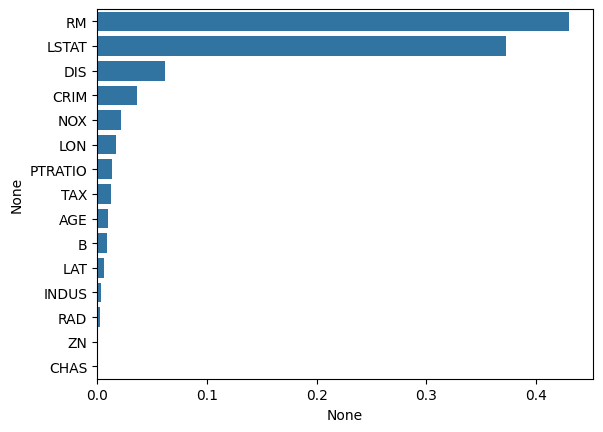

In [18]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators = 1000)
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data = rf_reg.feature_importances_, index = X_data.columns)
feature_series = feature_series.sort_values(ascending = False)
sns.barplot(x = feature_series, y = feature_series.index)

(100, 16)


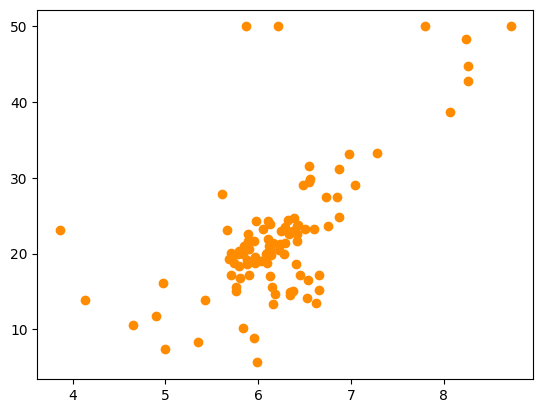

In [21]:
from matplotlib import pyplot as plt
boston_sample = boston[['RM', 'PRICE']]
boston_sample = boston.sample(n=100, random_state = 0)
print(boston_sample.shape)
plt.figure()
plt.scatter(boston_sample['RM'], boston_sample['PRICE'], c='darkorange')

In [22]:
import numpy as np
from sklearn.linear_model import LinearRegression

#선형 회귀와 결정 트리 기반의 Regressor 생성, 결정트리 최대 깊이는 각각 2, 7
lr_reg = LinearRegression()
rf_reg2= DecisionTreeRegressor(max_depth = 2)
rf_reg7 = DecisionTreeRegressor(max_depth = 7)

# 테스터용 데이터 세트 4.5~8.5 100개 데이터
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

X_feature = boston[['RM']].values.reshape(-1, 1)
y_target = boston['PRICE'].values.reshape(-1, 1)

lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

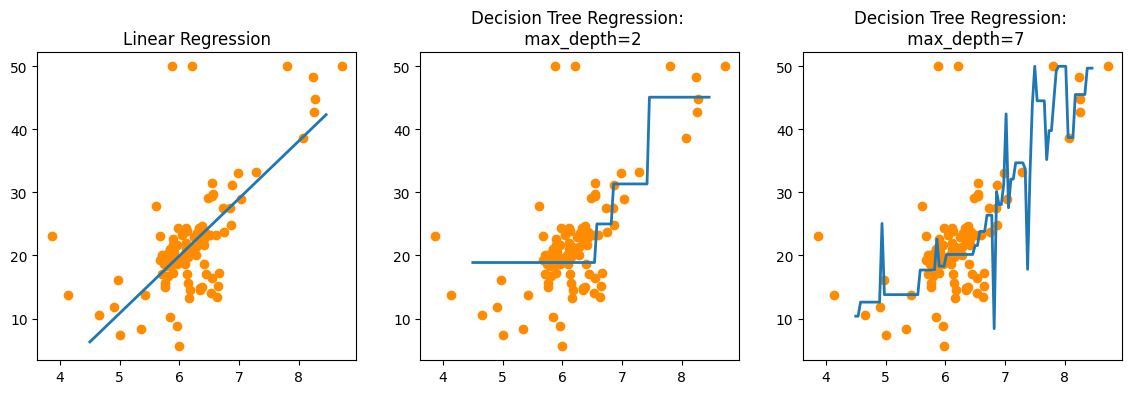

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14, 4), ncols =3)

#X축 값을 4.5~8.5 -> 선형회귀, 결정트리 회귀(2, 7) 예측선 시각화

#선형회귀
ax1.set_title('Linear Regression')
ax1.scatter(boston_sample['RM'], boston_sample.PRICE, c='darkorange')
ax1.plot(X_test, pred_lr, label='linear', linewidth=2)

#결정트리 max_depth = 2
ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(boston_sample['RM'], boston_sample.PRICE, c='darkorange')
ax2.plot(X_test, pred_rf2, label='max_depth:2', linewidth=2)

#결정트리 max_depth = 7
ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(boston_sample['RM'], boston_sample.PRICE, c='darkorange')
ax3.plot(X_test, pred_rf7, label='max_depth:7', linewidth=2)